# Notebook made to test the viability of Neural Network model.

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

Using TensorFlow backend.


In [2]:
df=pd.read_csv("../../Data/Imputed.csv")

In [3]:
df

,HINCP_x,SMOCP,NP,BDSP,INSP,RMSP,VALP,TAXAMT,ACR_<1.0>,ACR_<2.0>,...,YBL_<13.0>,YBL_<14.0>,YBL_<15.0>,YBL_<16.0>,YBL_<17.0>,YBL_<18.0>,YBL_<19.0>,YBL_<20.0>,YBL_<21.0>,YBL_<22.0>
0,47900.0,1042.0,4,3.0,890.0,6.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36100.0,691.0,2,3.0,600.0,6.0,35000.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000.0,1042.0,1,0.0,890.0,1.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,45000.0,1042.0,2,2.0,890.0,5.0,165000.0,3650.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88000.0,603.0,3,2.0,20.0,4.0,140.0,525.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,1,4.0,0.0,11.0,150000.0,6500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246498,150000.0,2603.0,4,4.0,1200.0,8.0,275000.0,10500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246499,85000.0,751.0,2,3.0,550.0,6.0,145000.0,5750.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246500,117500.0,1168.0,2,4.0,990.0,10.0,500000.0,11500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#setting our dependent and independent variables
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [5]:
y=np.reshape(y.values,(-1,1))

In [6]:
#splitting our data once to get out train and hold out set
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [10]:
#instantiating our scalrs
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [11]:
#fitting our standard scalar
X_train_ss=ss_x.fit_transform(X_train)

In [12]:
#fitting out minmax scalar the less complex of the two scalars
X_train_mm=mm_x.fit_transform(X_train)

In [13]:
# The R-squared predictor
from keras import backend as K
def coeff_determination(y_true, y_pred):
    """https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/"""

    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [14]:
#First model
model=Sequential()
model.add(Dense(50 ,activation="relu",input_dim=47))
model.add(Dense(25 ,activation="selu"))
model.add(Dense(1 ,activation='linear'))
model.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])


In [15]:
model1=Sequential()
model1.add(Dense(50 ,activation="relu",input_dim=47))
model1.add(Dense(25 ,activation="selu"))
model1.add(Dense(1 ,activation='linear'))
model1.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])


In [16]:
model2=Sequential()
model2.add(Dense(50 ,activation="relu",input_dim=47))
model2.add(Dense(25 ,activation="selu"))
model2.add(Dense(1 ,activation='linear'))
model2.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae",coeff_determination])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                2400      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 3,701
Trainable params: 3,701
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Creating early stop function to help minimize time of models
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')
callbacks_list = [early_stop]

In [19]:
history=model.fit(X_train,y_train,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 3s 20us/step - loss: 6551789435.7404 - root_mean_squared_error: 86088.0625 - mae: 49475.1641 - coeff_determination: 0.1313 - val_loss: 6261887175.7126 - val_root_mean_squared_error: 80784.8359 - val_mae: 48455.9492 - val_coeff_determination: 0.2351
Epoch 2/50
157760/157760 [==============================] - 3s 19us/step - loss: 6047944032.3205 - root_mean_squared_error: 79950.6250 - mae: 48153.4336 - coeff_determination: 0.2135 - val_loss: 6422848964.9281 - val_root_mean_squared_error: 79414.6484 - val_mae: 47253.4375 - val_coeff_determination: 0.2517
Epoch 00002: early stopping


In [20]:
history1=model1.fit(X_train_ss,y_train,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 3s 20us/step - loss: 10125181137.5051 - root_mean_squared_error: 115168.2734 - mae: 63617.7930 - coeff_determination: -0.3329 - val_loss: 6552829702.5816 - val_root_mean_squared_error: 98723.4062 - val_mae: 47952.6875 - val_coeff_determination: 0.1925
Epoch 2/50
157760/157760 [==============================] - 3s 19us/step - loss: 5776545537.7120 - root_mean_squared_error: 92073.0156 - mae: 44594.4062 - coeff_determination: 0.2629 - val_loss: 5891480591.8730 - val_root_mean_squared_error: 87747.1250 - val_mae: 43843.2812 - val_coeff_determination: 0.2989
Epoch 3/50
157760/157760 [==============================] - 3s 19us/step - loss: 5443792616.7667 - root_mean_squared_error: 85238.9141 - mae: 42654.3438 - coeff_determination: 0.3147 - val_loss: 5708949117.0987 - val_root_mean_squared_error: 83340.8672 - val_mae: 42715.8867 - val_coeff_determination: 0.3266
Epoch 4/50
157760/1

In [22]:
history2=model2.fit(X_train_mm,y_train,epochs=50,batch_size=50,validation_split=.2,callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/50
157760/157760 [==============================] - 3s 20us/step - loss: 10196912356.6166 - root_mean_squared_error: 114132.6406 - mae: 61654.2461 - coeff_determination: -0.2625 - val_loss: 7744684221.8986 - val_root_mean_squared_error: 99731.5000 - val_mae: 52952.2695 - val_coeff_determination: 0.1428
Epoch 2/50
157760/157760 [==============================] - 3s 20us/step - loss: 6834834224.6004 - root_mean_squared_error: 94679.5234 - mae: 49954.9453 - coeff_determination: 0.2019 - val_loss: 6854131402.3932 - val_root_mean_squared_error: 91401.3672 - val_mae: 48474.7656 - val_coeff_determination: 0.2405
Epoch 3/50
157760/157760 [==============================] - 3s 20us/step - loss: 6186917811.3671 - root_mean_squared_error: 89170.9844 - mae: 46313.4414 - coeff_determination: 0.2733 - val_loss: 6352862950.5986 - val_root_mean_squared_error: 87376.7266 - val_mae: 45896.4414 - val_coeff_determination: 0.2894
Epoch 4/50
157760/1

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


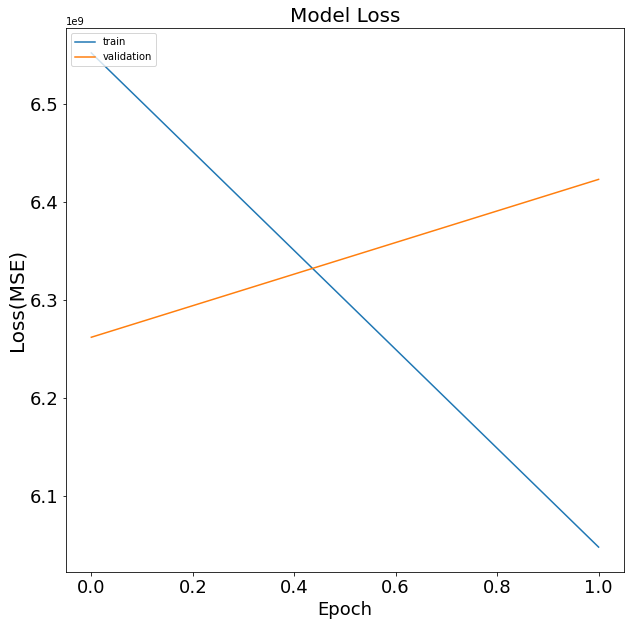

In [24]:
#plotting loss of base model
print(history.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("../../Reports/Figures/base_nnmodel_results",transparent=True,bbox_inches="tight",)
plt.show();

Look like the val data is performing better than train data so we may need to try a regularization tool to help close the gap.

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


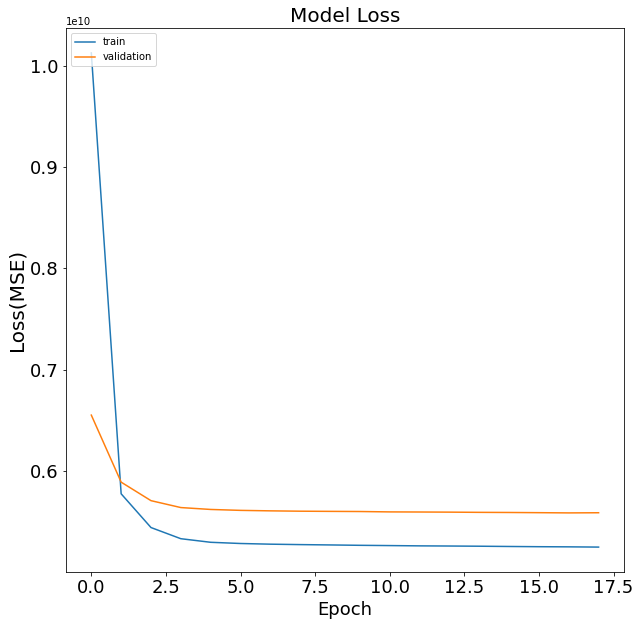

In [26]:
#plotting loss of Standard scalar
print(history1.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("../../Reports/Figures/nnmodel1_results",transparent=True,bbox_inches="tight",)
plt.show();

Now looking at the standard scalar model there is less of a gap between the train and validation set, but still  a very large mse

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'val_coeff_determination', 'loss', 'root_mean_squared_error', 'mae', 'coeff_determination'])


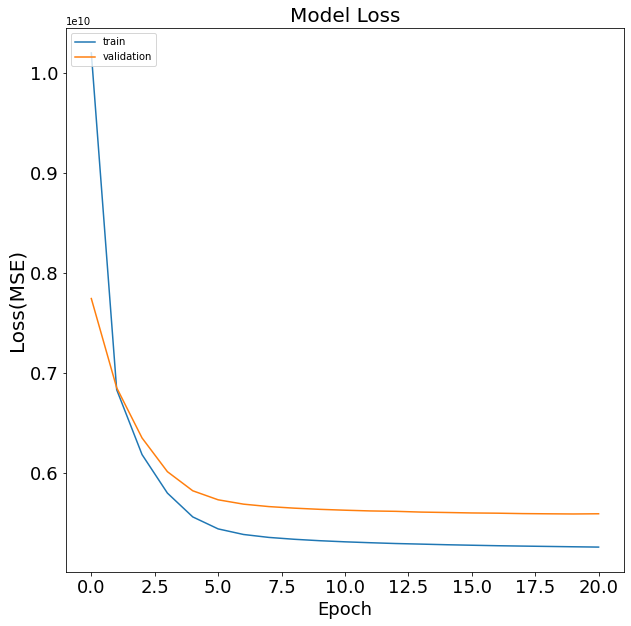

In [27]:
#plotting loss of Minmax Scalar
print(history2.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss',fontsize=20)
plt.ylabel('Loss(MSE)',fontsize=20)
plt.xlabel('Epoch',fontsize=18)
plt.tick_params(axis="both",labelsize=18)
plt.legend(['train','validation'],loc='upper left')
plt.savefig("../../Reports/Figures/nnmodel2_results",transparent=True,bbox_inches="tight",)
plt.show();

The Minmax scalar is have a similar reaction as the standard scalar where the min max between the validation and test set are close, but once again the mse is still an enormous number.